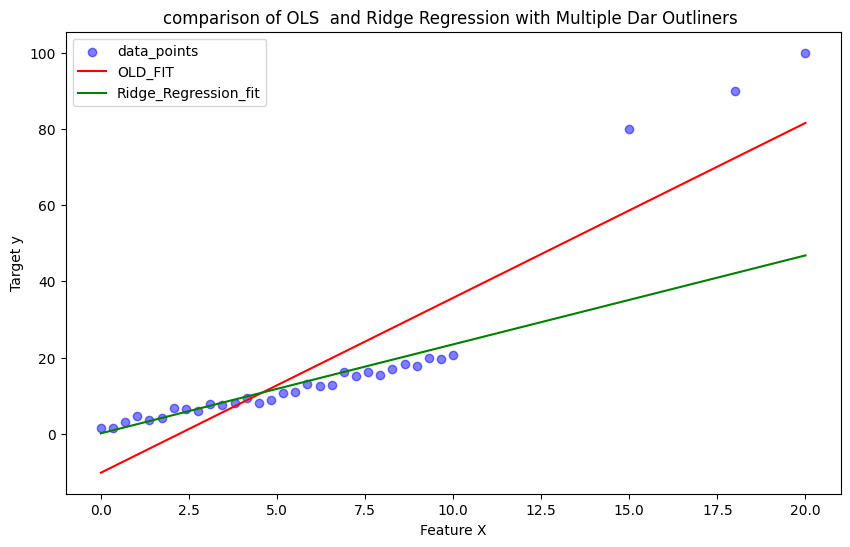

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

#set random seed for reproductibitly 
np.random.seed(42)

#generate a simple linear dataset
n_samples = 30 
X_input = np.linspace(0,10,n_samples)
y=  2 * X_input + 1 + np.random.randn(n_samples)# True slope = 2 , intercept = 1 , some noise 

#add three impactful outliers (we are constructing the noise points)
X_input = np.append(X_input , [15,18,20])
y = np.append(y, [80,90,100])

#add the intersept term this is augmentation to the x input 
X = np.hstack([np.ones((n_samples + 3 , 1 )), X_input.reshape(-1,1)])

#compute the OLS and ridge regression solutions
beta_OLS = np.linalg.inv(X.T@X)@ X.T @ y
lambda_ridge = 1000 # a stronger lambda to emphasize Ridge's dampening effect 
I = np.eye(X.shape[1])
beta_Ridge = np.linalg.inv(X.T @ X + lambda_ridge * I) @ X.T @ y

#prepare to plot
plt.figure(figsize=(10,6))
plt.scatter(X_input,y,color = 'blue',alpha = 0.5 , label = 'data_points')

#plot the OLS fit
x_range = np.linspace(np.min(X_input), np.max(X_input),100)
y_OLS = beta_OLS[0] + beta_OLS[1] * x_range
plt.plot(x_range , y_OLS , 'r-', label = 'OLD_FIT')

#PLOT THE RIDGE REGRESSION FIT
y_Ridge = beta_Ridge[0] + beta_Ridge[1] * x_range 
plt.plot(x_range , y_Ridge , 'g-' , label = 'Ridge_Regression_fit')

plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('comparison of OLS  and Ridge Regression with Multiple Far Outliners ')
plt.legend()
plt.show()

In [5]:
X

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.34482759],
       [ 1.        ,  0.68965517],
       [ 1.        ,  1.03448276],
       [ 1.        ,  1.37931034],
       [ 1.        ,  1.72413793],
       [ 1.        ,  2.06896552],
       [ 1.        ,  2.4137931 ],
       [ 1.        ,  2.75862069],
       [ 1.        ,  3.10344828],
       [ 1.        ,  3.44827586],
       [ 1.        ,  3.79310345],
       [ 1.        ,  4.13793103],
       [ 1.        ,  4.48275862],
       [ 1.        ,  4.82758621],
       [ 1.        ,  5.17241379],
       [ 1.        ,  5.51724138],
       [ 1.        ,  5.86206897],
       [ 1.        ,  6.20689655],
       [ 1.        ,  6.55172414],
       [ 1.        ,  6.89655172],
       [ 1.        ,  7.24137931],
       [ 1.        ,  7.5862069 ],
       [ 1.        ,  7.93103448],
       [ 1.        ,  8.27586207],
       [ 1.        ,  8.62068966],
       [ 1.        ,  8.96551724],
       [ 1.        ,  9.31034483],
       [ 1.        ,

In [8]:
y

array([  1.49671415,   1.55139087,   3.02699888,   4.59199537,
         3.52446731,   4.21413891,   6.71714385,   6.59502094,
         6.04776699,   7.7494566 ,   7.43313403,   8.12047714,
         9.51782434,   8.052237  ,   8.93025458,  10.78254006,
        11.02165164,  13.03838526,  12.50576903,  12.69114457,
        16.25875222,  15.25698232,  16.239942  ,  15.43732078,
        17.00734141,  18.3523019 ,  17.78004091,  19.99638767,
        19.70970614,  20.70830625,  80.        ,  90.        ,
       100.        ])

In [9]:
beta_OLS[1]

np.float64(4.58942769863536)

In [10]:
beta_Ridge[1]

np.float64(2.3347277015540007)